予測モデルの訓練の流れ

1. データセットを訓練データとテストデータに分割
2. 説明変数の標準化
3. 予測モデルの指定
4. 損失関数の指定
5. 訓練データと損失関数を用いたモデルの訓練
6. テストデータを用いたモデルの評価
---
Flow of training a predictive model

1. split the dataset into training and test data
2. standardize explanatory variables
3. specify a predictive model
4. specify a loss function
5. train the model using the training data and the loss function
6. evaluate the model using the test data

目的

* **説明変数を標準化し**、住宅価格を予測する重回帰モデルを実装します。
---
Objective

* **Standardize the explanatory variables** and implement a multiple regression model to predict house prices.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ライブラリのインポート/Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# データセットの読み込み/Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5data/BostonHousing.csv')

# 先頭5行の表示/Display the first 5 rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 説明変数Xと目的変数yの設定
# Set explanatory variable X and target variable y
# 全ての説明変数を選択/Select all explanatory variables
X=df.iloc[:, 0:13].values
# 目的変数に住宅価格(medv)を設定/Set housing price (medv) as the target variable
y = df['medv'].values

# 説明変数と目的変数の先頭3行を表示/Display the first three rows of the explanatory and target variables
X[:3], y[:3]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00]]),
 array([24. , 21.6, 34.7]))

In [5]:
# 1. データセットを訓練データとテストデータに分割/Split dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：',X_train.shape,' y_trainの形状：',y_train.shape,' X_testの形状：',X_test.shape,' y_testの形状：',y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


StandardScalerのメソッド/Methods of StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* StandardScalerはデータセットの標準化機能を提供します。
* StandardScaler provides the function of standardizing a dataset.

* fit(X): 配列Xの平均と標準偏差を計算して記憶する。
* fit(X): Calculate and store the mean and standard deviation of array X.

* テストデータの場合は、比較的データ数が少なく、トレーニングデータの統計を使って正規化や欠損値処理を行うべきなので、トレーニングデータに対するfit()の結果で、transform()を行う。
* In the case of test data, the number of data is relatively small and the statistics of the training data should be used for normalization and missing value processing, so transform() is performed with the result of fit() on the training data.

In [6]:
# 2. 説明変数の標準化/Standardize explanatory variables
# クラスのインスタンスを生成
# Create an instance of the class
sc = StandardScaler()

# (X)に対してfitとtransformを行う
# Perform fit and transform on (X)
# 生成したインスタンスからfit_transform()メソッドを呼ぶ
# Call the fit_transform() method from the generated instance
X_train_std = sc.fit_transform(X_train)

# 配列Xに変換を施して変換後の配列を返す
# Performs a transformation on array X and returns the transformed array
X_test_std = sc.transform(X_test)

# 標準化された訓練データ
# Standardized training data
X_train_std[0]

array([-0.37257438, -0.49960763, -0.70492455,  3.66450153, -0.42487874,
        0.93567804,  0.69366877, -0.4372179 , -0.16224243, -0.56165616,
       -0.48463784,  0.3716906 , -0.41100022])

In [7]:
# 標準化後の説明変数をNumpyからPandasに変換し表示
# Transform standardized explanatory variables from Numpy to Pandas and display
df_X_std = pd.DataFrame(X_train_std)

# ヘッダの追加/Add headers
df_X_std.columns=['crim','zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# 先頭5行の表示/Display the first 5 rows
df_X_std.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.372574,-0.499608,-0.704925,3.664502,-0.424879,0.935678,0.693669,-0.437218,-0.162242,-0.561656,-0.484638,0.371691,-0.411000
1,-0.397099,-0.499608,-0.044878,-0.272888,-1.241859,-0.491181,-1.835528,0.730055,-0.624648,-0.573376,0.336491,0.205012,-0.387681
2,-0.402693,0.771168,-0.886760,-0.272888,-1.111490,0.857849,-0.524621,1.234769,-0.393445,-0.602677,-0.849584,0.366609,-0.181919
3,-0.405769,0.029882,-0.465819,-0.272888,-0.277127,-0.417676,-0.086464,0.861527,-0.509046,-0.538216,-1.488240,0.415732,-0.037886
4,2.774932,-0.499608,0.998884,-0.272888,1.070021,-1.438097,0.715042,-1.021528,1.687378,1.542121,0.792674,-2.613393,1.911362


In [8]:
# 3. 予測モデルの指定 4. 損失関数の指定 5. 訓練データと損失関数を用いたモデルの訓練
# 3. specify specify the predictive model 4. specify the loss function 5. train the model using the training data and the loss function
# 線形回帰モデルを作成/Create a linear regression model
model = LinearRegression()

# モデルの訓練/Train the model
model.fit(X_train_std, y_train)

LinearRegression()

In [9]:
# モデルからパラメータの取り出し
# Extract parameters from the model
# パラメータベクトルを表示し、符号が正の説明変数は価格の上昇要因となり、負の説明変数は下落要因
# Display parameter vectors, where explanatory variables with positive signs are factors that cause prices to rise, and negative explanatory variables are factors that cause prices to fall
print('slope:', model.coef_)

# バイアスのパラメータ
# Bias parameter
print('intercept:', model.intercept_)

slope: [-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]
intercept: 22.611881188118836


In [10]:
# 説明変数の列テキスト表示/Column text display for explanatory variables
X_columns = df.columns[0:13]
X_columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

coef_: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* 係数の算出はcoef_を使用
* coef_ is used to calculate coefficients

np.argsort: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

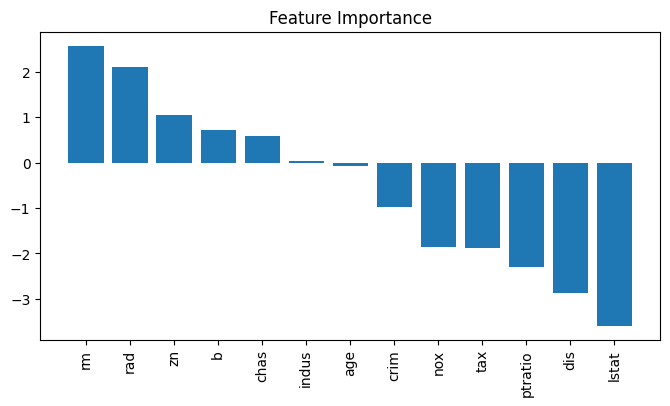

In [11]:
# 説明変数の重要性を計算/Calculate the importance of explanatory variables
importances = model.coef_

# 説明変数の重要性を降順にソート/Sort in descending order of importance of explanatory variables
indices = np.argsort(importances)[::-1]

# 説明変数の名前をソートした順に並び替え/Sort by name of explanatory variable in sorted order
names = [X_columns[i] for i in indices]

# 傾きのパラメータを用いて住宅価格に影響を及ぼす説明変数を可視化
# Visualize the explanatory variables that affect housing prices using slope parameters
# RM(平均部屋数)は住宅価格上昇の影響を及ぼし、LSTAT（低所得者の割合）は下落の影響を及ぼす
# RM (average number of rooms) influences housing price increases, while LSTAT (percentage of low-income residents) influences declines
plt.figure(figsize=(8,4)) #プロットのサイズ指定/Specify plot size
plt.title("Feature Importance") # プロットのタイトルを作成/Create a plot title
plt.bar(range(df.iloc[:, 1:].shape[1]), importances[indices]) # 棒グラフを追加/Add bar chart
plt.xticks(range(df.iloc[:, 1:].shape[1]), names, rotation=90) # X軸に説明変数の名前を追加/Add the name of the explanatory variable to the X axis

plt.show() # プロットを表示/Show Plot

In [12]:
# 6. テストデータを用いたモデルの評価/Evaluate the model using test data
# 訓練データ、テストデータの住宅価格を予測/Predicts housing prices on training and test data
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

# 正解の住宅価格と予測の住宅価格の差のMSEを計算/Calculate the MSE of the correct and predicted housing prices
print('MSE train: %.2f, test: %.2f' % (
    np.mean((y_train - y_train_pred) ** 2),
    np.mean((y_test - y_test_pred) ** 2)))

MSE train: 19.33, test: 33.45


sklearn.metrics.mean_squared_error: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* scikit-learnのライブラリを用いて、回帰モデルの予測精度を評価します。
* 平均二乗誤差 (Mean Squared Error：MSE)は予測モデルの評価に用いられます。
---
* Using the scikit-learn library, we evaluate the predictive accuracy of regression models.
* Mean Squared Error (MSE) is used to evaluate the predictive model.

In [13]:
# MSEを計算/Calculate MSE
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 19.33, test: 33.45


In [14]:
# 推論の先頭10件を表示/Display the first 10 inferences
y_test_pred[:10]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ])

In [15]:
# 正解の先頭10件を表示/Display the first 10 correct answers
y_test[:10]

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6])

* 回帰の評価方法の残差プロットを実行します。
* 残差プロットは訓練データとテストデータそれぞれの予測の住宅価格を横軸、住宅価格の残差（予測－正解）を縦軸に設定してプロットします。
---
* Run a residual plot of the regression evaluation method.
* The residual plot is plotted with the training data and test data each with the predicted housing price on the horizontal axis and the residual (predicted - correct) housing price on the vertical axis.

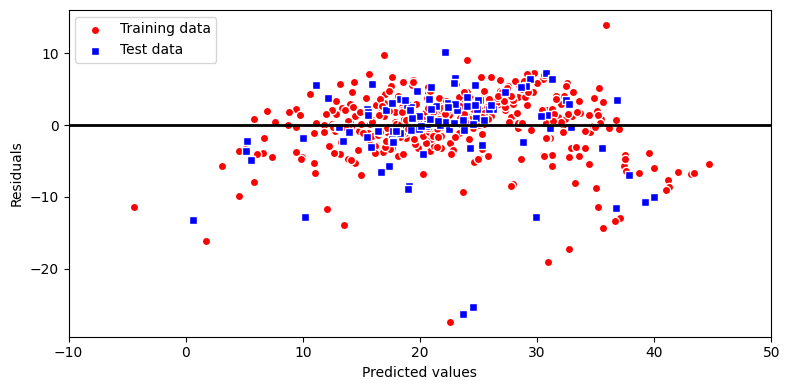

In [16]:
# 残差プロット/residual plot
plt.figure(figsize=(8,4)) #プロットのサイズ指定/Specify plot size

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='red', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='blue', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

指標の見方/How to read the indicators
* ばらつきが小さいほど性能が良いモデルになります。
* The smaller the variation, the better the model performs.